<a href="https://colab.research.google.com/github/dreas27/Proyek-Pertama-Predictive-Analytics/blob/main/Copy_of_SDR_Andreas_dan_Lowis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-

# **Data Loading**

In [2]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load the dataset
url = '/content/laptop_price.csv'
laptop = pd.read_csv(url , encoding=('ISO-8859-1'), low_memory = False )
laptop

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
laptop.shape

(1303, 13)

Output kode di atas memberikan informasi sebagai berikut:

- Ada 1303 baris records dalam dataset.
- Terdapat 13 kolom yaitu: laptop_id, company, product, typename, inchies, screenresolution, cpu, ram, memory, gpu, opsys, weight, prices_euros.

# **Exploratory Data Analysis**

## Deskripsi Variabel

- laptop_id : Adalah Daftar dari Urutan Laptop
- company : adalah brand atau perusahaan pembuat laptop
- product : adalah Merk dari laptop
- typename : adalah jenis dari laptop
- inchies : adalah dimensi laptop
- screenresolution : adalah resolusi layar laptop
- cpu : adalah prosesor atau otak laptop
- ram : adalah tempat penyimpanan data sementara
- memory : adalah penyimpanan utama data laptop
- gpu : adalah perangkat untuk rendering grafis
- opsys : sistem operasi perangkat lunak
- weight : berat dari laptop
- prices_euros : adalah harga dari laptop


In [ ]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Dari output terlihat bahwa:
- Terdapat 10 kolom dengan tipe object, yaitu: company, product, typename, inchies, screenresolution, cpu, ram, memory, gpu, opsys, weight. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 2 kolom numerik dengan tipe data float64 yaitu: Inchies, dan Prices_Euros.
- Terdapat 1 kolom numerik dengan tipe data int64, yaitu: laptop_ID Kolom laptop_ID merupakan target data_base.

In [ ]:
laptop.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.


## Data Assesing

### Data Duplikat

In [ ]:
laptop.duplicated().sum()

0

### Missing Value

In [ ]:
laptop.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

## Data Cleaning

## Data Analysis

Selanjutnya, lakukan proses analisis data dengan teknik Univariate EDA. Pertama, Anda bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [ ]:
categorical_features = ['Company', 'Product', 'Typename', 'Inchies', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']
numerical_features = ['Inchies', 'Prices_euros', 'laptop_ID']

### Univariate Analysis

Univariate visualization merupakan bentuk visualisasi data yang hanya merepresentasikan informasi yang terdapat pada satu variabel. Jenis visualisasi ini umumnya digunakan untuk memberikan gambaran terkait distribusi sebuah variabel dalam suatu dataset.

a. Data Kategori

           Jumlah sampel  Persentase
Dell                 297        22.8
Lenovo               297        22.8
HP                   274        21.0
Asus                 158        12.1
Acer                 103         7.9
MSI                   54         4.1
Toshiba               48         3.7
Apple                 21         1.6
Samsung                9         0.7
Razer                  7         0.5
Mediacom               7         0.5
Microsoft              6         0.5
Xiaomi                 4         0.3
Vero                   4         0.3
Chuwi                  3         0.2
Google                 3         0.2
Fujitsu                3         0.2
LG                     3         0.2
Huawei                 2         0.2


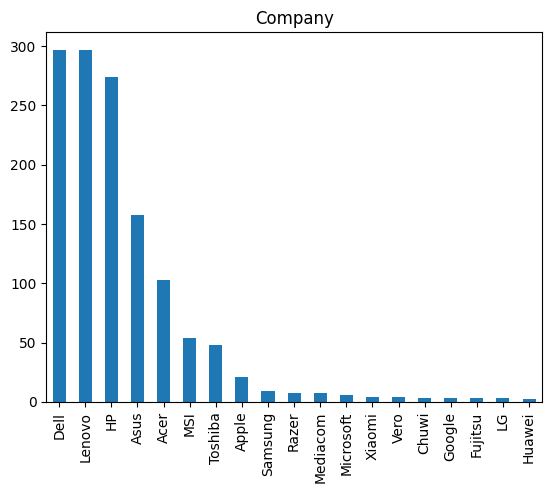

In [ ]:
feature = categorical_features[0]
count = laptop[feature].value_counts()
percent = 100*laptop[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

b. Data Numerik

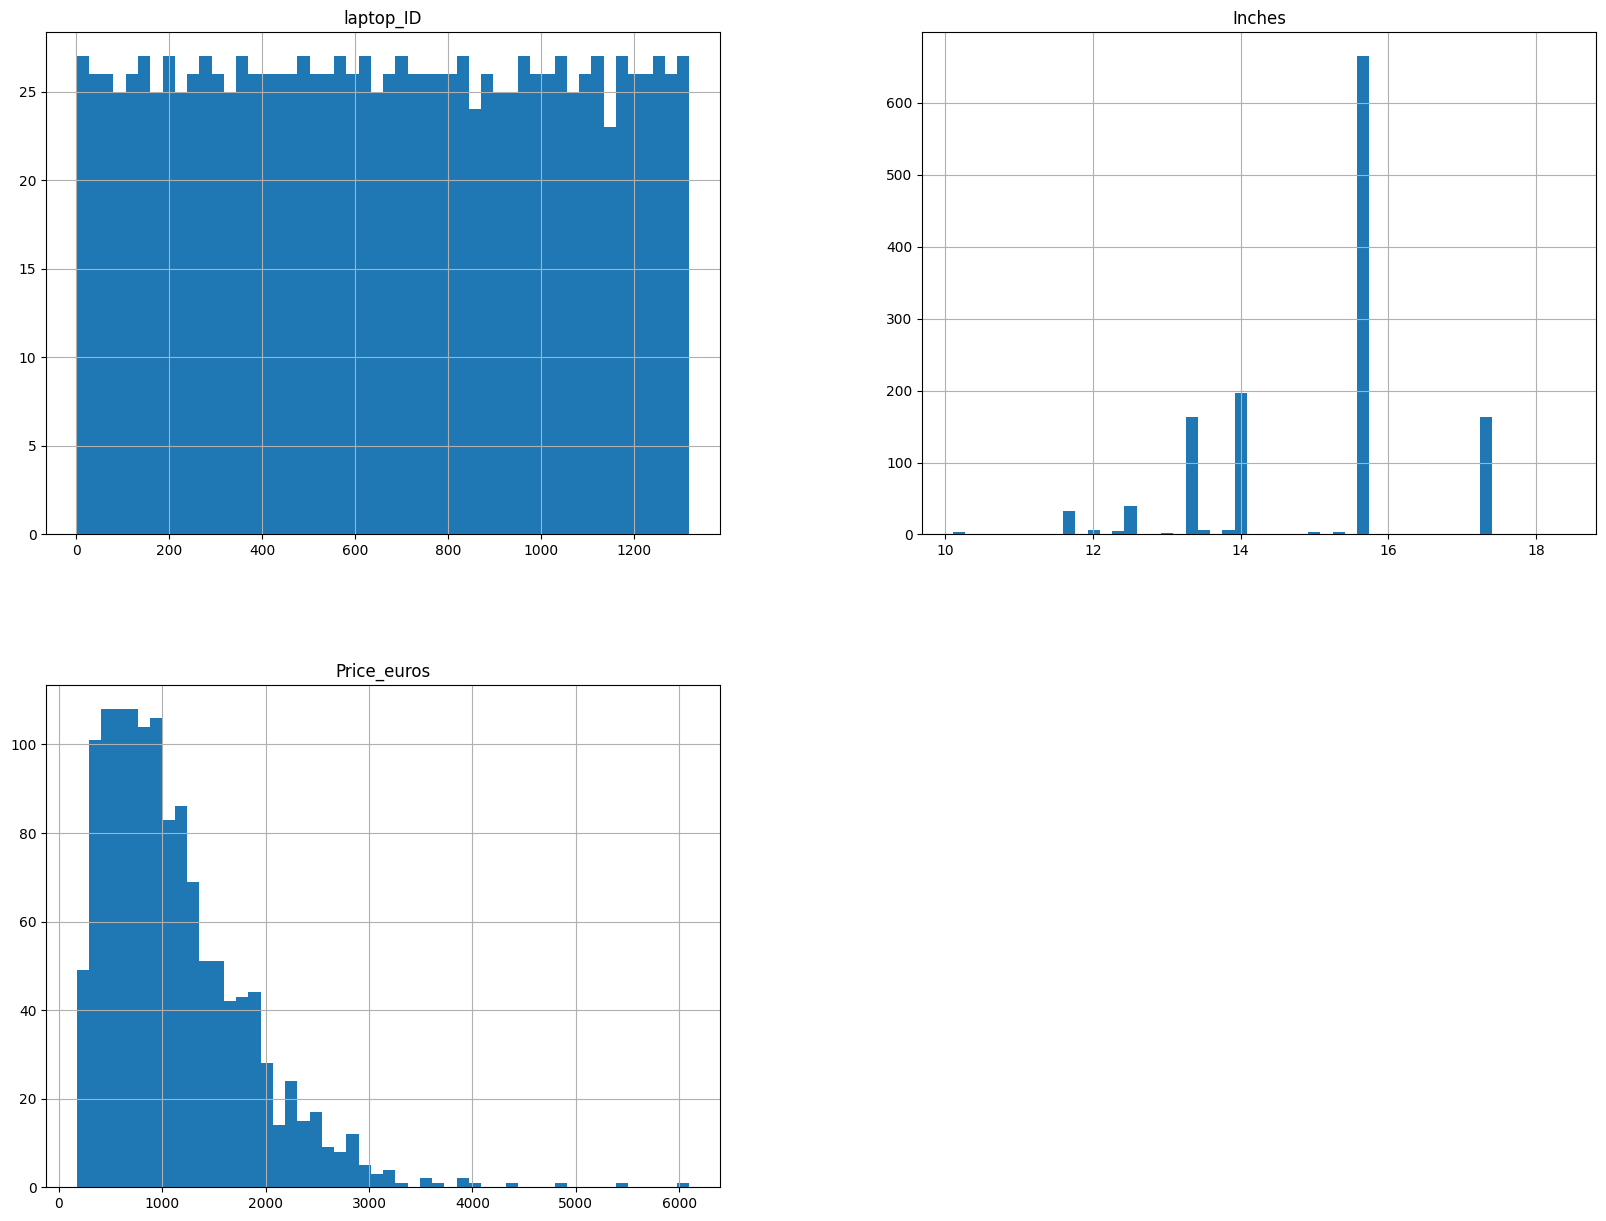

In [ ]:
laptop.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram "prices_euros", diperoleh beberapa informasi, antara lain:
- Peningkatan harga median rumah sebanding dengan penurunan jumlah sampel. Hal ini dapat terlihat jelas dari histogram "prices_euros" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

### Multivariate Analysis

Multivariate visualization merupakan jenis visualisasi data untuk menggambarkan informasi yang terdapat dalam lebih dari dua variabel. Jenis visualisasi ini digunakan untuk merepresentasikan hubungan dan pola yang terdapat dalam multidimensional data.  

Pada tahap ini,cek rata-rata "prices_euro" terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap "prices_euro".

a. Data Kategori

In [7]:
cat_features = laptop.select_dtypes(include='Ram').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='Prices_euros', kind="bar", dodge=False, height = 4, aspect = 3,  data=housing, palette="Set3")
  plt.title("Rata-rata 'Price_euros' relatif terhadap - {}".format(col))

TypeError: data type 'Ram' not understood